---
title: "Régression linéaire simple avec Python"
author: "Jason Suárez"
date: "2024-01-30"
categories: ["Data Science", "Python"]
image: "image.png"
draft: true
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *


/var/folders/yj/l9r_dtt126ncwq1x9jfz7xkw0000gn/T/ipykernel_92240/1519608195.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = pd.read_csv('data/train.csv')
dataset.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
dataset.describe()


,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


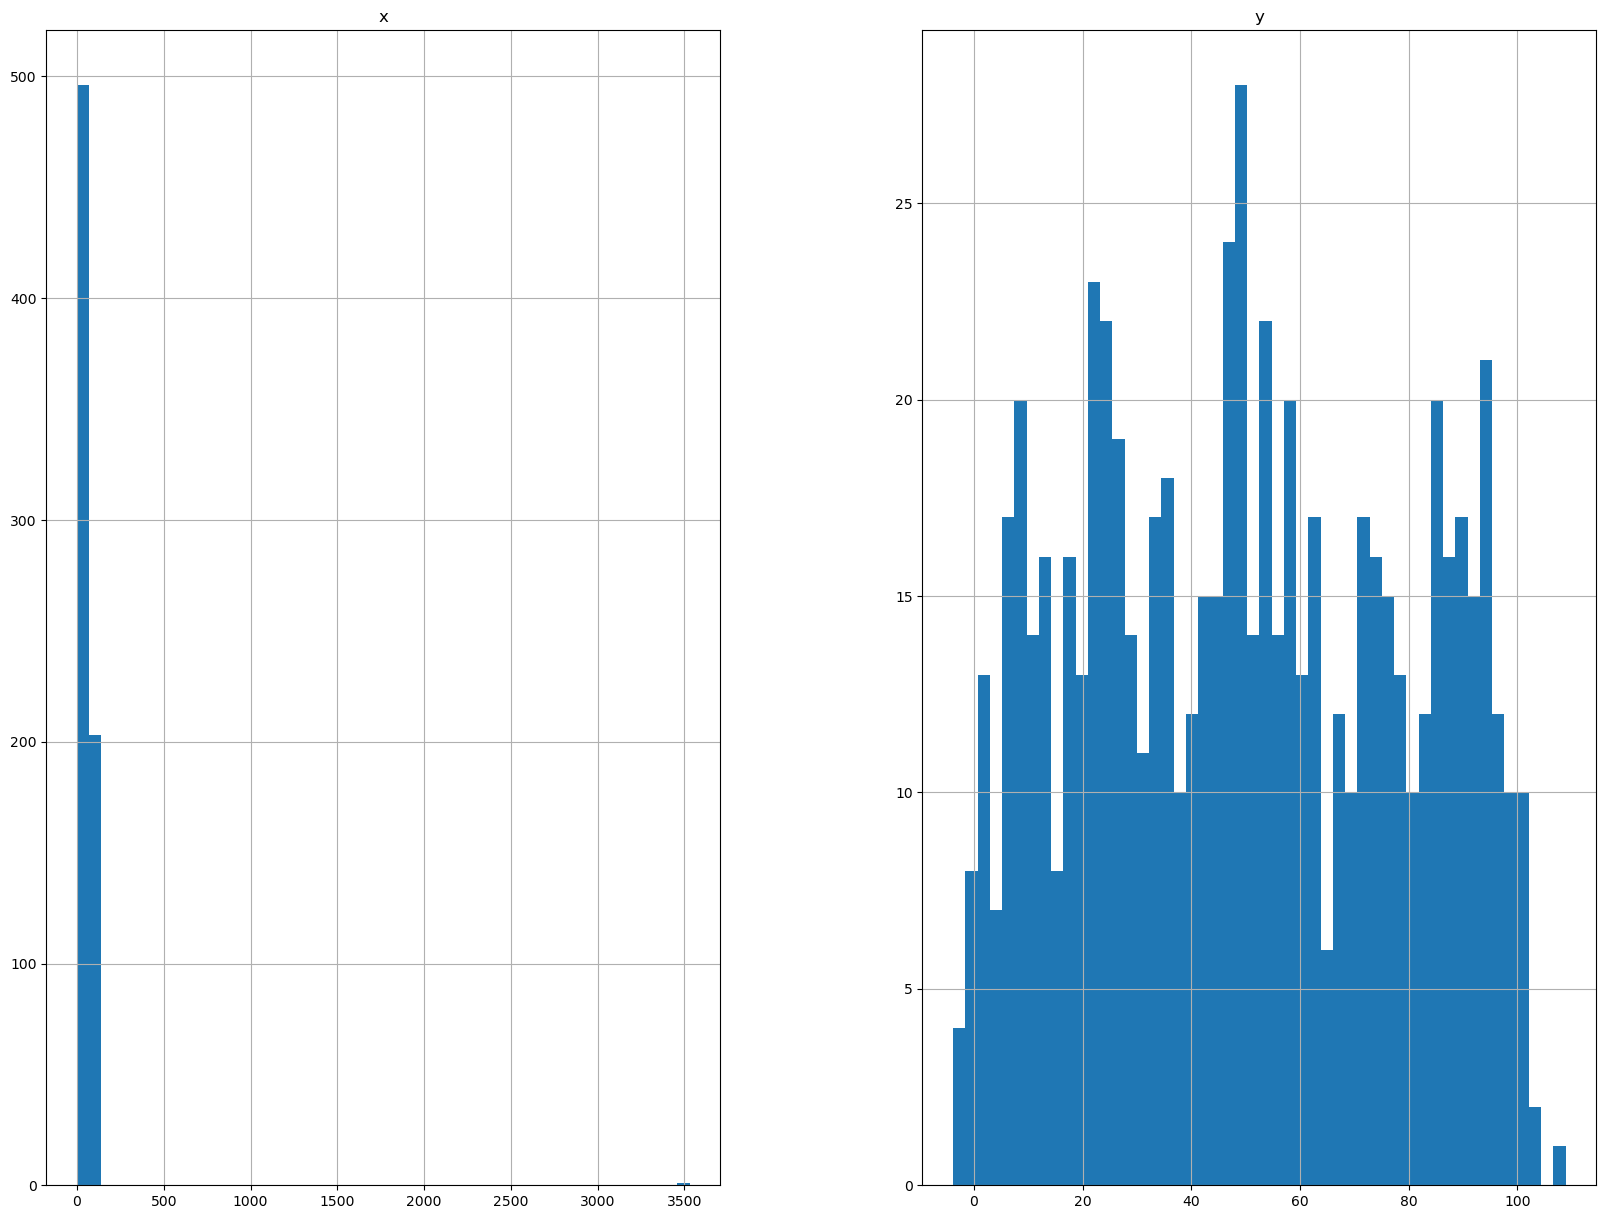

In [4]:
# Plotting the distribution of the data
dataset.hist(bins=50, figsize=(20,15))
plt.show()


In [5]:
# Plotting the correlation matrix
corr_matrix = dataset.corr()
corr_matrix['y'].sort_values(ascending=False)

y    1.00000
x    0.99534
Name: y, dtype: float64

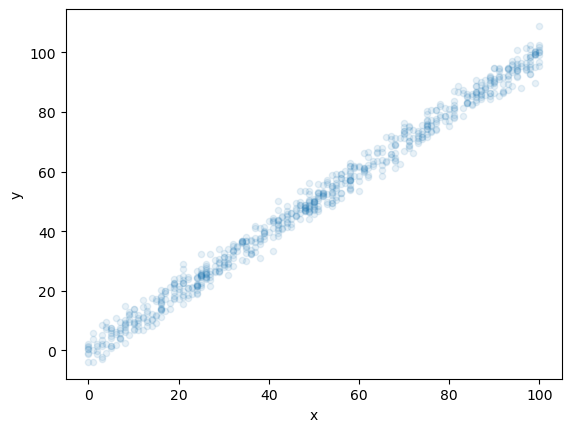

In [6]:
# Scatter plot of the dataset to see the points distribution
dataset.plot(kind='scatter', x='x', y='y', alpha=0.1)
plt.show()



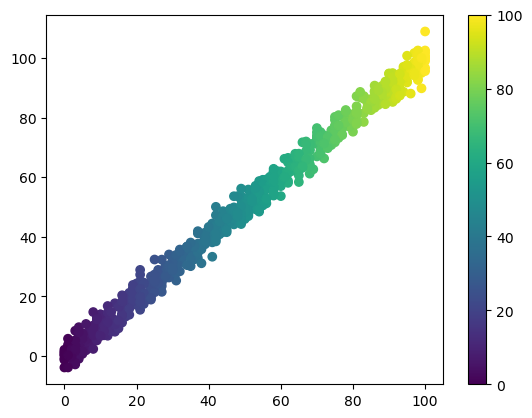

In [7]:
# Plot the X points in one color and the Y points in another color
# to see the difference between the two
plt.scatter(dataset['x'], dataset['y'], c=dataset['x'], cmap='viridis')
plt.colorbar()
plt.show()


In [8]:
columns = dataset.columns
columns

Index(['x', 'y'], dtype='object')

In [9]:
X_full = dataset.x.to_numpy().reshape(-1, 1)
y_full = dataset.y.to_numpy().reshape(-1, 1)

In [10]:
X_train, X_val, y_train, y_val = dataset_splitter(X_full, y_full, 0.4)
X_val, y_val, X_test, y_test = dataset_splitter(X_val, y_val, 0.5)

X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
train_size: 60.0% - test_size: 40.0%
X_train: 60%
X_val: 40%
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
X type: <class 'numpy.ndarray'>
y type: <class 'numpy.ndarray'>
train_size: 50.0% - test_size: 50.0%
X_train: 50%
X_val: 50%


In [11]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_train[:4])
print(y_train[:4])

(420, 1) (420, 1)
(140, 1) (140, 1)
[[75.]
 [43.]
 [84.]
 [62.]]
[[79.20610113]
 [41.02251779]
 [85.02778957]
 [58.750127  ]]


In [13]:
# Normalizing the data
X_train = normalize(X_train)

In [14]:
# initialize parameters
w_init = 1
b_init = 1
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final = gradient_descent(
    X_train,
    y_train,
    w_init,
    b_init,
    tmp_alpha,
    iterations,
    compute_cost,
    compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

cost =  [nan]
Iteration 0: Cost [nan]  dj_dw: [nan], dj_db: [nan]   w: [nan], b:[nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost =  [nan]
cost

KeyboardInterrupt: 